# maysics.calc模块使用说明

calc模块包含十个函数

|名称|作用|
|---|---|
|lim|极限|
|ha|哈密顿算符|
|grad|梯度|
|nebla_dot|nebla算子点乘|
|nebla_cross|nebla算子叉乘|
|laplace|拉普拉斯算子|
|rect|矩形函数|
|sigmoid|S型函数|
|step|阶跃函数|
|inte|积分|

<br></br>
## 求极限：lim
lim(f, x0, acc=0.01, method='both', param={})
<br>```f```：函数类型，求极限的函数
<br>```x0```：浮点数类型，取极限的点
<br>```method```：字符串类型，可选'both'、'+'、'-'，分别表示双边极限、右极限、左极限
<br>```param```：当f函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
求函数f在acc的误差下，$x\rightarrow x_{0}$的函数值

### DEMO 1-1：求函数$y=\frac{sin(x)}{x}$中$x\rightarrow0$时的值

In [1]:
import maysics as ms
import numpy as np

def f(x):
    return np.sin(x) / x

ms.calc.lim(f, 0)

0.9999833334166665

<br></br>
## 哈密顿算符：ha
<br>ha(f, m, u, acc=0.1, param={}, args={})
<br>```f```：函数类型，函数，函数需要以数组作为输入（不能是数）
<br>```m```：数类型，粒子质量
<br>```u```：数或函数，势能
<br>```param```：字典类型，当f函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```args```：字典类型，当u为函数时有效，当u函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
哈密顿算符：$\hat{H}=-\frac{\hbar^{2}{\nabla^{2}}}{2m}+U$
<br>求函数f在acc误差下，粒子质量为m，势能为u时，通过哈密顿算符生成的新函数

### DEMO 2-1：求函数$y=x$通过哈密顿算符生成的新函数

In [2]:
import maysics as ms

def f(x):
    return x

# m=1, u=2
f_new = ms.calc.ha(f, 1, 2)

# 输出x=(1, 2, 3)时的函数值
f_new([1, 2, 3])

array([2., 4., 6.])

<br></br>
## 梯度：grad
grad(f, x, acc=0.1, param={})
<br>```f```：函数类型，要求函数f返回一个数值
<br>```x```：数或数组，函数的输入值，不支持批量输入
<br>```acc```：浮点数类型，可选，求导的精度
<br>```param```：当f函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
在acc误差下计算函数f在x处的梯度

### DEMO 3-1：求函数$y=x^{2}+y^{2}$在点$(3, 3)$处的梯度

In [3]:
import maysics as ms

def f(x):
    return x[0]**2 + x[1]**2

ms.calc.grad(f, [3, 3])

array([6., 6.])

<br></br>
## nebla算子：nebla_dot和nebla_cross
nebla_dot(f, x, acc=0.1, param={})
<br>```f```：函数类型，要求函数f返回一个列表
<br>```x```：数或数组，函数的输入值，不支持批量输入
<br>```acc```：浮点数类型，求导的精度
<br>```param```：字典类型，当f函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典

nebla_cross(f, x, acc=0.1, param={})
<br>```f```：函数类型，要求函数f返回一个列表
<br>```x```：数或数组，函数的输入值，不支持批量输入
<br>```acc```：浮点数类型，求导的精度
<br>```param```：字典类型，当f函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
nebla_dot用于点乘矢量函数：$\nabla\centerdot\vec{f}$
<br>nebla_cross用于叉乘矢量函数：$\nabla\times\vec{f}$（此时函数f的输出必须是三维的）
<br>用法类似grad函数

### DEMO 4-1：$\nabla\centerdot\vec{f}$，$\vec{f}=x^{2}\vec{i}+y^{2}\vec{j}+z^{2}\vec{k}$在点$(1,1,1)$的函数值

In [4]:
import maysics as ms

def f(x):
    return x[0]**2, x[1]**2, x[2]**2

ms.calc.nebla_dot(f, [1, 1, 1])

array([2., 2., 2.])

### DEMO 4-2：$\nabla\times\vec{f}$，$\vec{f}=x^{2}\vec{i}+y^{2}\vec{j}+z^{2}\vec{k}$在点$(1,1,1)$的函数值

In [5]:
import maysics as ms

def f(x):
    return x[0]**2, x[1]**2, x[2]**2

ms.calc.nebla_cross(f, [1, 1, 1])

array([0., 0., 0.])

<br></br>
## 拉普拉斯算子：laplace
laplace(f, x, acc=0.1, param={})
<br>```f```：函数类型，需以一维数组作为输入，且不支持批量输入
<br>```x```：一维数组或二维数组
<br>```acc```：浮点数类型，求导的精度，默认为0.1
<br>```param```：字典类型，当f函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典

### 功能说明
$\Delta=\nabla^{2}$

### DEMO 5-1：不支持小批量输入函数：$f(x,y,z)=x^{2}+y^{2}+z^{2}$在点$(1,1,1)$的$\Delta f$值

In [6]:
import maysics as ms

def f(x):
    return sum(x**2)

ms.calc.laplace(f, [1,1,1])

6.000000000000137

### DEMO 5-2：支持小批量输入函数：$f(x,y,z)=x^{2}+y^{2}+z^{2}$在点集${(1,1,1),(2,2,2)}$的$\Delta f$值

In [7]:
import maysics as ms

def f(x):
    return (x**2).sum(axis=1)

ms.calc.laplace(f, [[1,1,1],[2,2,2]])

array([6., 6.])

<br></br>
## 矩形函数：rect
rect(x, x0=0, h=1, d=0.5)
<br>```x```：数或数组，自变量
<br>```x0```、```h```、```d```均为数类型，含义如下述公式所示

$$
f(x)=\left\{\begin{array}{cc}
h & , & x\in [x_{0}-d, x_{0}+d], \\
0 & , & else.\\
\end{array}\right.
$$

### DEMO 6-1：绘制x0=0，h=1，d=0.5的矩形函数图像

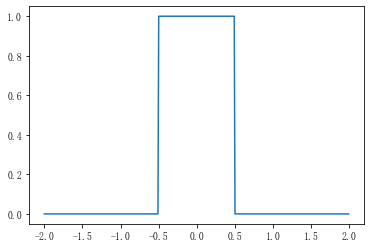

In [8]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-2, 2, 0.01)
plt.plot(x, ms.calc.rect(x))
plt.show()

<br></br>
## S型函数：sigmoid
sigmoid(x, a=1, b=0, c=1)
<br>```x```：数或数组，自变量
<br>```a```、```b```、```c```均为数类型，含义如下述公式所示

$$f(x)=\frac{a}{1-e^{b-cx}}$$

### DEMO 7-1：绘制a=1，b=0，c=1的S型函数图像

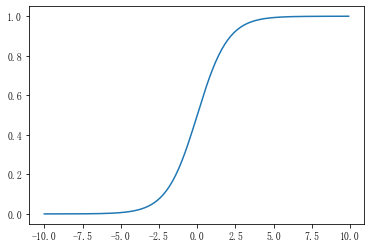

In [9]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-10, 10, 0.1)
plt.plot(x, ms.calc.sigmoid(x))

<br></br>
## 阶跃函数：step
step(x, x0=0, h=1)
<br>```x```：数或数组，自变量
<br>```x0```、```h```均为数类型，含义如下述公式所示

$$
f(x)=\left\{\begin{array}{cc}
h & , & x>x_{0}, \\
\frac{h}{2} & , & x=x_{0},\\
0 & , & x<x_{0},\\
\end{array}\right.
$$

### DEMO 8-1：绘制x0=0，h=1的阶跃函数图像

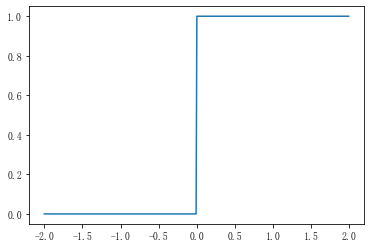

In [10]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-2, 2, 0.01)
plt.plot(x, ms.calc.step(x))
plt.show()

<br></br>
## 定积分：inte
inte(func, area, method='rect', dim=1, param={}, condition=None, args={}, acc=0.1, loop=10000, height=1, random_state=None)
<br>```func```：函数类型，被积函数
<br>```area```：二维数组，积分区域，由自变量上下限列表组成
<br>&emsp;如：积分区域为[a, b]时，area=[[a, b]]
<br>&emsp;&emsp;&emsp;积分区域为二维区域x1∈[a1, b1]，x2属于[a2, b2]时，area=[[a1, b1], [a2, b2]]
<br>```method```：字符串类型，可选'rect'和'mc'，分别表示使用矩形法和蒙特卡洛法进行积分，```acc```参数仅对矩形法起作用，```loop```、```height```和```random_state```参数仅对蒙特卡洛法起作用
<br>```dim```：整型，可选1或2，1表示被积函数的输入为1维数组，适用于普通输入函数，2表示被积函数的输入为2维数组，适用于小批量输入函数，
<br>```param```：字典类型，当被积函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```condition```：函数类型，条件函数，符合条件的输出Ture，否则输出False，条件函数的第一个参数的输入须为1维数组
<br>```args```：字典类型，当条件函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```acc```：浮点数或数组类型，可选，积分精度，只有method='rect'时才有效
<br>```loop```：整型，产生的随机数数目，只有method='mc'时才有效
<br>```height```：浮点数类型，高度，只有method='mc'时才有效
<br>```random_state```：整型，随机种子，只有method='mc'时才有效

### 使用矩形法进行定积分
超矩形的大小为：$f(x)\times acc^{dim}$

### DEMO 9-1：求$f(x)=sin(x)$在0到π上的积分

In [11]:
import maysics as ms
import numpy as np

ms.calc.inte(np.sin, [[0, np.pi]])

1.9995479597125976

### DEMO 9-2：求$f(x)=Asin(x)$在0到π上的积分

In [12]:
import maysics as ms
import numpy as np

def f(x, A):
    return A * np.sin(x)

# 取A=2
ms.calc.inte(f, [[0, np.pi]], args={'A':2})

3.999095919425195

### DEMO 9-3：求$f(x)=2sin(x)$在0到π上函数值小于等于1区域的积分

In [13]:
import maysics as ms
import numpy as np

def c(x):
    if 2 * np.sin(x) <= 1:
        return True
    else:
        return False

# 取A=2
ms.calc.inte(np.sin, [[0, np.pi]], condition=c)

0.26471848651129565

### DEMO 9-4：求$f(x,y)=x^{2}+y^{2}$在$x\in[-2,2]$，$y\in[-1,1]$的积分

In [14]:
import maysics as ms

def f(x):
    return x[0]**2 + x[1]**2

ms.calc.inte(f, [[-2, 2], [-1, 1]])

13.360000000000017

### 使用蒙特卡洛法进行定积分
在$area\times height$的超矩形中随机产生loop个散点（注意$height\geq maxf(x)$在area中恒成立）
<br>将$y\leq f(x)$的散点数记为n，则积分$\approx\frac{n}{loop}\times area \times height$
<br>random_state是随机种子

### DEMO 9-5：求f(x)=2sin(x)在0到π上的积分

In [15]:
import maysics as ms
import numpy as np

def f(x):
    return 2 * np.sin(x)

ms.calc.inte(f, [[0, np.pi]], method='mc', height=2)

4.008672225980576

### DEMO 9-6：求$f(x,y)=x^{2}+y^{2}$在$x\in[-2,2]$，$y\in[-1,1]$的积分

In [16]:
import maysics as ms

def f(x):
    return x[0]**2 + x[1]**2

ms.calc.inte(f, [[-2, 2], [-1, 1]], method='mc', height=5)

13.212